# 版本说明v6 #
1. 使用LinearRegressor
2. 使用pipeline
3. 添加自定义的Transformer，可以选择指定的成分
4. 针对各个参数进行了调优
5. 封装了工具方法
6. 是mse作为scoring
7. 对原始数据重新排序

# 拆分训练集和验证集 #

In [1]:
from hw1_utils_v5 import *
from sklearn.model_selection import train_test_split
%load_ext autoreload
%autoreload 2

X_train_full,y_train_full,X_test,test_options = load_data() # 加载训练和测试数据

n_features = X_train_full.shape[1]

In [2]:
new_index = np.arange(X_train_full.shape[0])
np.random.RandomState(0).shuffle(new_index) # 生成新的索引

In [3]:
# 重新排序一下
X_train_full = X_train_full.reindex(new_index)
y_train_full = pd.DataFrame(y_train_full).reindex(new_index).to_numpy().ravel()

In [4]:
X_train_full.index = range(X_train_full.shape[0]) # 重新生成一下index

In [6]:
X_train_full.shape

(5652, 162)

# 使用LinearRegression模型 ##

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def rmse_cross_val_score(model,X,y):
    return cross_val_score(model,X,y,scoring='neg_root_mean_squared_error').mean() * -1
    
rmse_cross_val_score(LinearRegression(),X_train_full,y_train_full)

5.915237888430732

# 使用RFE

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('std',StandardScaler()),
                           ('rfe',RFE(LinearRegression())),
                           ('model',LinearRegression())])

In [16]:
train_scores,valid_scores = validation_curve(pipeline,X_train_full,y_train_full,
                                             'rfe__n_features_to_select',range(45,55),
                                             scoring='neg_root_mean_squared_error',n_jobs=-1)

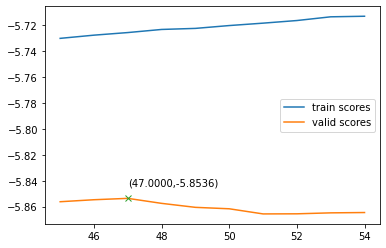

(47, -5.853626382166203)

In [18]:
plot_validation_curve(train_scores,valid_scores,range(45,55))

# 输出数据 #

In [7]:
# -5.838246851696371
from sklearn.feature_selection import RFE

pipeline = Pipeline(steps=[('std',StandardScaler()),
                           ('rfe',RFE(LinearRegression(),50)),
                           ('model',LinearRegression())])

pipeline.fit(X_train_full,y_train_full)

preds_test = pipeline.predict(X_test)
ids = ['id_' + str(i) for i in range(len(X_test))]
output = pd.DataFrame({'id':ids,
                           'value':preds_test})
output.to_csv('output/pm25_submission.csv',index=False)

NameError: name 'Pipeline' is not defined